# Question 01
Build a machine learning model to predict profit of the company based on
different expenses for a given dataset \
Link : [https://drive.google.com/open?id=1dic5dbHugytxCO6i9pcD6RPod_sLkAUA]

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler as SS
SS=SS()
from sklearn.metrics import *
%matplotlib inline

In [2]:
# Reading in the data
try:
    data = pd.read_csv("50_Startups.csv")
except Exception as e:
    print(f"Error : {e}")

### Data Processing and Analysis

In [3]:
data.sample(5)   # Printing the first 5 rows of data

,R&D Spend,Administration,Marketing Spend,State,Profit
36,28663.76,127056.21,201126.82,Florida,90708.19
13,91992.39,135495.07,252664.93,California,134307.35
2,153441.51,101145.55,407934.54,Florida,191050.39
5,131876.90,99814.71,362861.36,New York,156991.12
28,66051.52,182645.56,118148.20,Florida,103282.38


In [4]:
data.shape

(50, 5)

In [5]:
data['State'].nunique()

3

In [6]:
data['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

### Visually Exploring the Data (EDA)

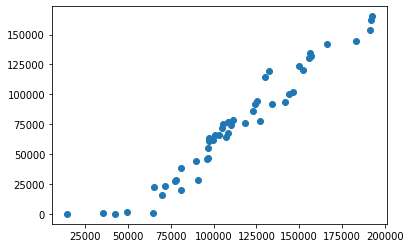

In [7]:
plt.scatter(data['Profit'], data['R&D Spend'])
plt.show()

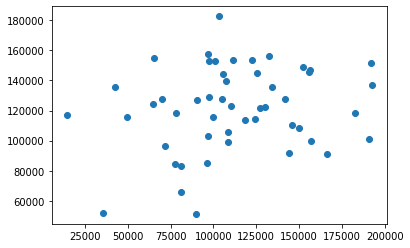

In [8]:
plt.scatter(data['Profit'], data['Administration'])
plt.show()

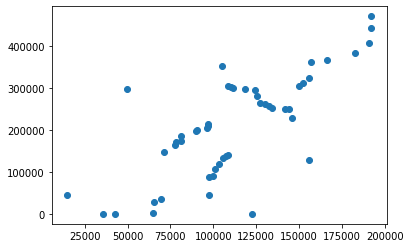

In [9]:
plt.scatter(data['Profit'], data['Marketing Spend'])
plt.show()

In [10]:
data.head()   # Printing the first 5 rows of data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [11]:
data.tail()   # Printing the last 5 rows of data

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [12]:
data.shape

(50, 5)

array([[<AxesSubplot:title={'center':'R&D Spend'}>,
        <AxesSubplot:title={'center':'Administration'}>],
       [<AxesSubplot:title={'center':'Marketing Spend'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

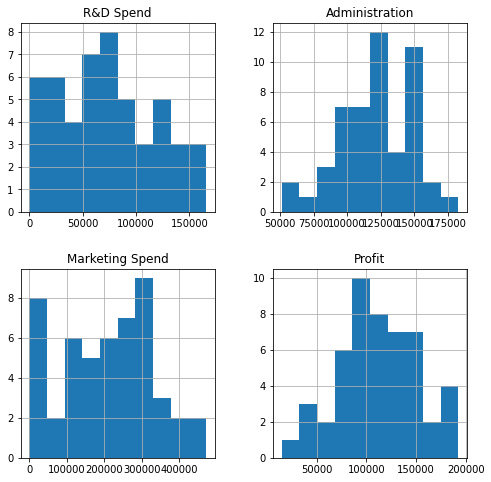

In [13]:
data.hist(figsize=(8,8))

In [14]:
data.describe()       # Generating statistical summary of the data

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [16]:
data.dtypes       # Checking the data types of the columns

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

### DAta Splitting

In [17]:
X = data.drop('Profit', axis = 1)
y = data['Profit']

In [18]:
X.shape

(50, 4)

In [19]:
y[:10]

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
5    156991.12
6    156122.51
7    155752.60
8    152211.77
9    149759.96
Name: Profit, dtype: float64

### Transforming Categorical Features

In [20]:
X = pd.get_dummies(X,drop_first=True)

In [21]:
# states = pd.get_dummies(X['State'],drop_first=True)
# X_temp = X.drop('State',axis=1)
# X_temp = pd.concat([X_temp,states],axis=1)

In [22]:
X.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State_Florida      0
State_New York     0
dtype: int64

In [23]:
X.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State_Florida        uint8
State_New York       uint8
dtype: object

In [24]:
X.loc[:,"State_Florida"] = X.loc[:,"State_Florida"].astype(dtype="float64")
X.loc[:,"State_New York"] = X.loc[:,"State_New York"].astype(dtype="float64")

In [25]:
X.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State_Florida      float64
State_New York     float64
dtype: object

In [26]:
X.isnull().any()   # Checking the data for null values

R&D Spend          False
Administration     False
Marketing Spend    False
State_Florida      False
State_New York     False
dtype: bool

In [27]:
X.sample(5)

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
11,100671.96,91790.61,249744.55,0.0,0.0
32,63408.86,129219.61,46085.25,0.0,0.0
29,65605.48,153032.06,107138.38,0.0,1.0
1,162597.70,151377.59,443898.53,0.0,0.0
37,44069.95,51283.14,197029.42,0.0,0.0


<AxesSubplot:>

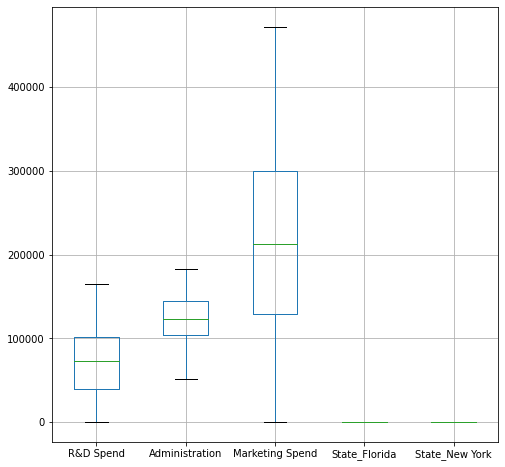

In [28]:
# Boxplot to find the outliers in the columns
X.boxplot(figsize=(8,8))

In [29]:
# Function to remove the outliers from the whole dataset
def remove_outlier(data):
    quant_df = data.quantile([0.10, 0.90])
    for name in list(data.columns): data = data[(data[name] > quant_df.loc[0.10, name]) & (data[name] < quant_df.loc[0.90, name])]
    return data

In [30]:
# df = remove_outlier(df)       No observable outliers

In [31]:
X.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State_Florida      0
State_New York     0
dtype: int64

array([[<AxesSubplot:title={'center':'R&D Spend'}>,
        <AxesSubplot:title={'center':'Administration'}>],
       [<AxesSubplot:title={'center':'Marketing Spend'}>,
        <AxesSubplot:title={'center':'State_Florida'}>],
       [<AxesSubplot:title={'center':'State_New York'}>, <AxesSubplot:>]],
      dtype=object)

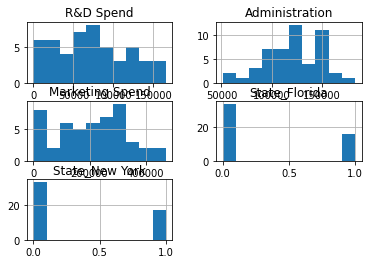

In [32]:
X.hist()

In [33]:
X.describe()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,0.471212,0.478518
min,0.000000,51283.140000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,1.000000,1.000000


> Visualizing the data to check for skewness and reduce it

In [34]:
X.skew()

R&D Spend          0.164002
Administration    -0.489025
Marketing Spend   -0.046472
State_Florida      0.795820
State_New York     0.696595
dtype: float64

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

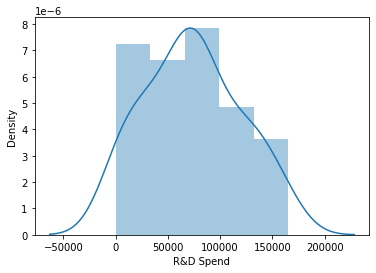

In [35]:
sn.distplot(X['R&D Spend'])

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

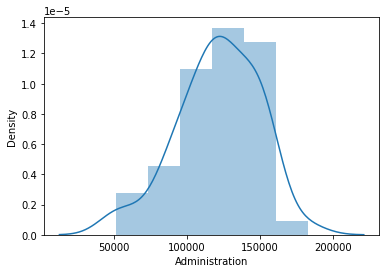

In [36]:
sn.distplot(X['Administration'])

Skewness is 0.17680660607998128
Mean is 15493818885.474445 , Median is  15055246574.57405


c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

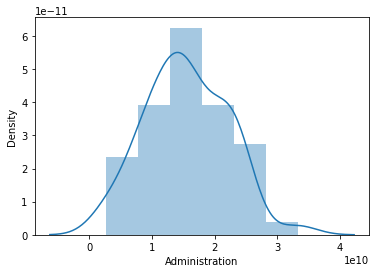

In [37]:
target = (np.square((X['Administration'])))
print ('Skewness is', target.skew())
print("Mean is",target.mean(), ", Median is ", target.median())
sn.distplot(target)
# X['Administration'] = target

In [38]:
X.describe()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,0.471212,0.478518
min,0.000000,51283.140000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,1.000000,1.000000


### Train/Test Split

In [39]:
# X = X.to_numpy()
# y = y.to_numpy()


In [40]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80)

In [41]:
type(X_train)

pandas.core.frame.DataFrame

In [42]:
# X_train = X_train.to_numpy().reshape(-1,1)
# y_train = y_train.to_numpy().reshape(-1,1)
# X_test = X_test.to_numpy().reshape(-1,1)
# y_test = y_test.to_numpy().reshape(-1,1)

### Data Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()

In [44]:
y_train = y_train.to_numpy().reshape(-1,1)

In [45]:
y_test = y_test.to_numpy().reshape(-1,1)

In [46]:

S_x = StandardScaler().fit(X_train.to_numpy())
S_y = StandardScaler().fit(y_train)
X_train = S_x.transform(X_train)
y_train= S_y.transform(y_train)
y_train= np.array(y_train)


c:\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [47]:
try:
    S_x_1 = StandardScaler().fit(X_test.to_numpy())
    S_y_1 = StandardScaler().fit(y_test)
    X_test = S_x_1.transform(X_test)
    y_test= S_y_1.transform(y_test)
except Exception as e:
    print(f"Error : {e}")

c:\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [48]:
# from sklearn.preprocessing import *
# # trying with scaling the output too output :
# # Y = X['y']
# rs = RobustScaler().fit(df)
# for item in df:
#     df[item]=rs.fit_transform(np.array(df[item]).reshape(-1,1))
# # X['y']=Y

### Model Fitting and Training

In [49]:
try:
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    print(regr.score(X_test, y_test))
except Exception as e:
    print(f"Error : {e}")

0.9164877854978243


### Model Testing

Error : x and y must be the same size


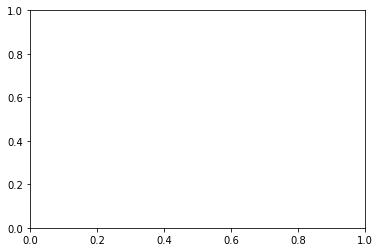

In [50]:
try:
    y_pred = regr.predict(X_test)
    plt.scatter(X_test, y_test, color ='red')
    plt.plot(X_test, y_pred, color ='blue')
    plt.show()
except Exception as e:
    print(f"Error : {e}")

### Evaluation Metrics

In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.22573655458387204
MSE: 0.08351221450217569
RMSE: 0.28898479977703967


In [52]:
Accuracy = (1-mse)*100

In [53]:
print(Accuracy)

91.64877854978243
